In [1]:
import sys
#print (sys.path)
sys.path.append('/Users/kefang/Softwares/analysis_001')

import os

import numpy as np

import healpy as hp

from scipy.optimize import minimize

import emcee

from KIPAC.nuXgal import Defaults

from KIPAC.nuXgal import file_utils

from KIPAC.nuXgal.EventGenerator import EventGenerator

from KIPAC.nuXgal.Likelihood import Likelihood

from KIPAC.nuXgal.file_utils import read_maps_from_fits, write_maps_to_fits

from KIPAC.nuXgal.hp_utils import vector_apply_mask, vector_apply_mask_hp

from KIPAC.nuXgal.plot_utils import FigureDict

from KIPAC.nuXgal.GalaxySample import GalaxySample

from KIPAC.nuXgal  import Utilityfunc

from KIPAC.nuXgal.WeightedAeff  import WeightedAeff

%matplotlib inline  

from KIPAC.nuXgal.NeutrinoSample  import NeutrinoSample
from scipy import stats

import matplotlib.pyplot as plt

from KIPAC.nuXgal.FermipyCastro import LnLFn


Using /Users/kefang/Softwares/analysis_001 for NUXGAL_DIR


## f_sky and auto correlation

In [2]:
gs_analy = GalaxySample('analy')

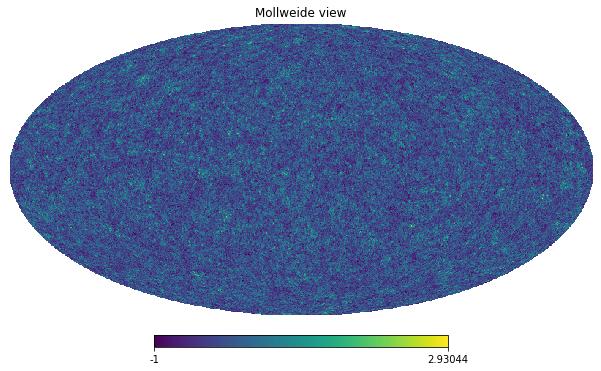

In [3]:
hp.mollview(gs_analy.overdensity)

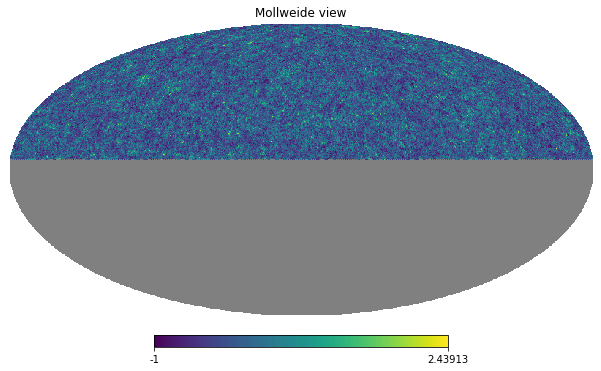

In [5]:
od_north = gs_analy.overdensity.copy()
od_north[Defaults.idx_muon] = hp.UNSEEN
hp.mollview(od_north)

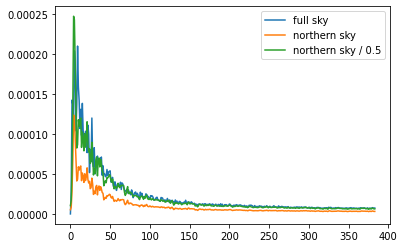

In [10]:
plt.plot(Defaults.ell, hp.anafast(gs_analy.overdensity), label='full sky')
plt.plot(Defaults.ell, hp.anafast(od_north), label='northern sky')
plt.plot(Defaults.ell, hp.anafast(od_north) / 0.5, label='northern sky / 0.5')
plt.legend()

## f_sky and cross correlation

In [17]:
gs_analy2 = GalaxySample('analy', computeGalaxy=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Applications/miniconda3/envs/nuXgal/lib/python3.7/site-packages/healpy-1.12.10-py3.7-macosx-10.7-x86_64.egg/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


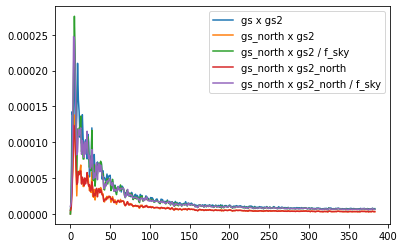

In [27]:
plt.plot(Defaults.ell, hp.anafast(gs_analy.overdensity, gs_analy2.overdensity), label='gs x gs2')
plt.plot(Defaults.ell, hp.anafast(od_north, gs_analy2.overdensity), label='gs_north x gs2')
plt.plot(Defaults.ell, hp.anafast(od_north, gs_analy2.overdensity) / 0.5, label='gs_north x gs2 / f_sky')

gs2_north = gs_analy2.overdensity.copy()
gs2_north[Defaults.idx_muon] = hp.UNSEEN

plt.plot(Defaults.ell, hp.anafast(od_north, gs2_north), label='gs_north x gs2_north')

plt.plot(Defaults.ell, hp.anafast(od_north, gs2_north) / 0.5 , label='gs_north x gs2_north / f_sky')




plt.legend()


